In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import os


In [2]:
df = pd.read_csv("D:/ML/World Happiness Report Analysis/Dataset/world-happiness-report-2021.csv")
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
df.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

No missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

<h3> Data Analysis

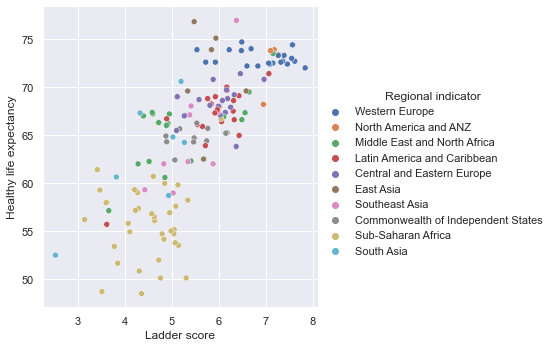

In [5]:
sns.set_theme()

sns.relplot(
    data=df,
    x='Ladder score', 
    y='Healthy life expectancy', 
    hue='Regional indicator')

In [6]:
top_25 = df[:25]
print(top_25['Regional indicator'].value_counts())
print(df['Regional indicator'].value_counts())

Western Europe                  15
North America and ANZ            4
Middle East and North Africa     3
Latin America and Caribbean      1
Central and Eastern Europe       1
East Asia                        1
Name: Regional indicator, dtype: int64
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64


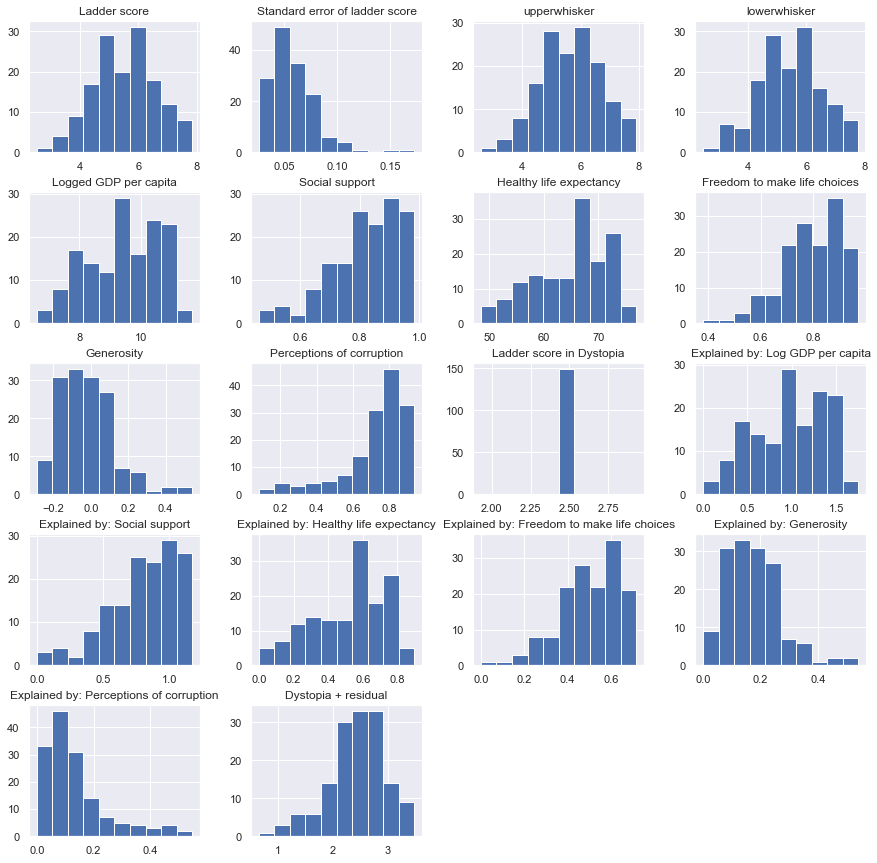

In [7]:
df.hist(figsize=(15,15))
plt.show()

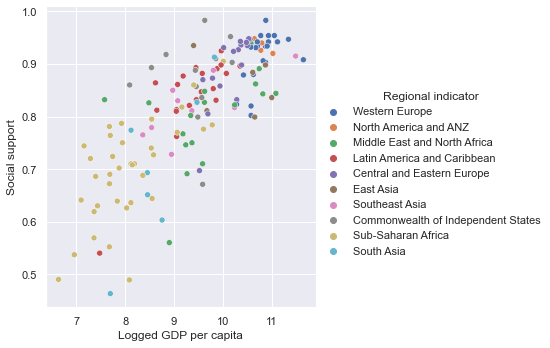

In [8]:
g = sns.relplot(data=df,
               x='Logged GDP per capita',
              y='Social support',
              hue='Regional indicator')

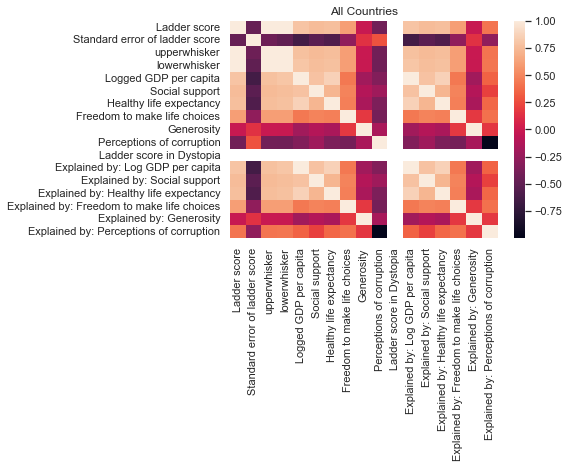

In [9]:
sns.set_theme(style="white")
ax = sns.heatmap(df[df.columns[:19]].corr()).set_title("All Countries")

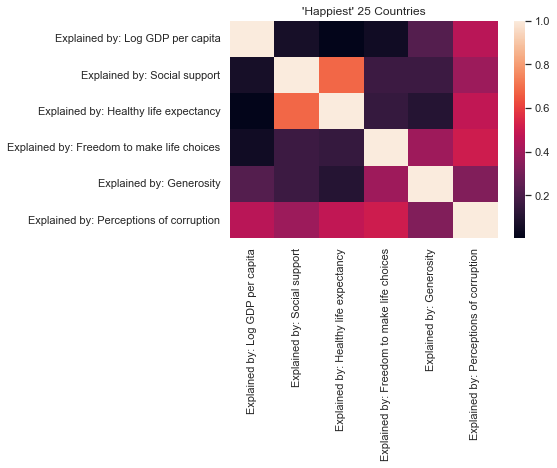

In [10]:
sns.set_theme(style="white")
ax = sns.heatmap(top_25[top_25.columns[13:19]].corr()).set_title("'Happiest' 25 Countries")

In [11]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
test_dataset

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784
19,Belgium,Western Europe,6.834,0.034,6.901,6.767,10.823,0.906,72.199,0.783,-0.153,0.646,2.43,1.463,0.998,0.747,0.489,0.088,0.187,2.862
21,Bahrain,Middle East and North Africa,6.647,0.068,6.779,6.514,10.669,0.862,69.495,0.925,0.089,0.722,2.43,1.409,0.899,0.662,0.661,0.246,0.139,2.631
25,Saudi Arabia,Middle East and North Africa,6.494,0.056,6.604,6.384,10.743,0.891,66.603,0.877,-0.149,0.684,2.43,1.435,0.964,0.571,0.603,0.090,0.163,2.668
29,Guatemala,Latin America and Caribbean,6.435,0.073,6.577,6.292,9.053,0.813,64.958,0.906,-0.038,0.775,2.43,0.845,0.790,0.519,0.638,0.163,0.105,3.375
36,Jamaica,Latin America and Caribbean,6.309,0.156,6.615,6.004,9.186,0.877,67.500,0.890,-0.137,0.884,2.43,0.891,0.932,0.599,0.618,0.099,0.035,3.135
39,Estonia,Central and Eastern Europe,6.189,0.038,6.263,6.115,10.481,0.941,68.800,0.909,-0.106,0.527,2.43,1.344,1.079,0.640,0.641,0.119,0.263,2.103
47,Serbia,Central and Eastern Europe,6.078,0.053,6.181,5.974,9.787,0.873,68.600,0.778,0.002,0.835,2.43,1.101,0.924,0.634,0.482,0.189,0.066,2.682
49,Mauritius,Sub-Saharan Africa,6.049,0.059,6.165,5.933,10.008,0.905,66.701,0.867,-0.054,0.789,2.43,1.178,0.996,0.574,0.590,0.153,0.096,2.462
58,Honduras,Latin America and Caribbean,5.919,0.082,6.081,5.758,8.648,0.812,67.300,0.857,0.081,0.809,2.43,0.703,0.787,0.593,0.578,0.241,0.083,2.934


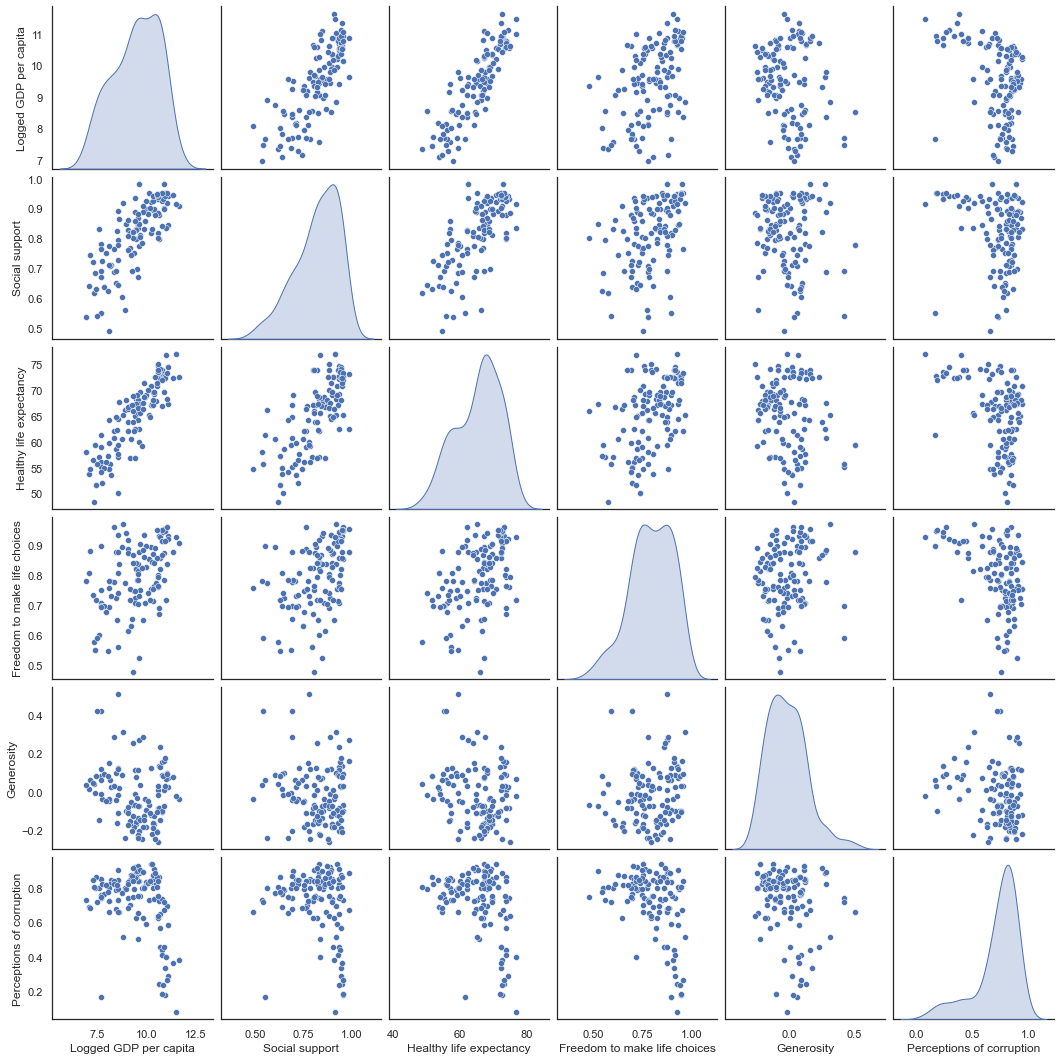

In [12]:
sns.pairplot(train_dataset[['Logged GDP per capita', 'Social support', 
                            'Healthy life expectancy', 'Freedom to make life choices', 
                           'Generosity', 'Perceptions of corruption']], diag_kind='kde')

In [13]:
# !pip install geopandas

In [14]:
X= df.drop(['Ladder score','Regional indicator','Country name'], axis=1)
y=df['Ladder score']
X.head()

,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [15]:
y

0      7.842
1      7.620
2      7.571
3      7.554
4      7.464
       ...  
144    3.512
145    3.467
146    3.415
147    3.145
148    2.523
Name: Ladder score, Length: 149, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis

models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    #"KNN": KNeighborsClassifier(),
    "SVM" :SVR(),
    #"c" : LinearDiscriminantAnalysis()
    #"Naive Bayes": GaussianNB(),
   # "Decisiontree": DecisionTreeClassifier(),
    #"RandomForest": RandomForestClassifier(),
    #"LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(x_train, y_train)
    print(model[0])
    print("Score: ", m.score(x_test,y_test))
    print("")

Linear Regression
Score:  0.9999998252364015

SVM
Score:  0.6710844770804236



In [18]:
life_exp_normalizer = preprocessing.Normalization(input_shape=[1,])

In [19]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
  ])
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model
dnn_life_exp_model = build_and_compile_model(life_exp_normalizer)
dnn_life_exp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [20]:
history = dnn_life_exp_model.fit(
    X['Explained by: Healthy life expectancy'], y, 
    validation_split=0.2,
    verbose=0, 
    epochs=100)

In [21]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Life Expectancy]')
    plt.legend()
    plt.grid(True)

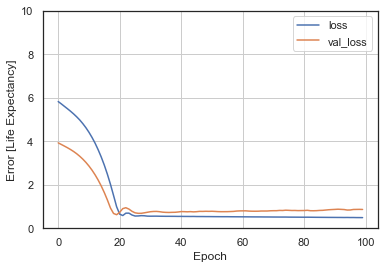

In [22]:
plot_loss(history)

Check for test data

In [23]:
%%time
test_results = {}
test_results['dnn_life_exp_model'] = dnn_life_exp_model.evaluate(
    x_test['Explained by: Healthy life expectancy'], 
    y_test, 
    verbose=0)

Wall time: 41.9 ms


You can see accuracy with Linear Regression id 99.99%